In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, DataFrame, concat

import os
path='E:\【ML_DL】\【服装项目】\dataset\shopN\data\shop_'

销售数据取自data_full.7z中的'sale_XXX.csv'系列csv文件，将所有sale数据进行合并。一共有638家店铺，其中取出：拥有数据数目大于100条可以用于lstm时序预测、以及日期可以满足预测条件的店铺，用shop_newest_len100表示       

In [2]:
shop_newest_len100 = [1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 69, 70, 72, 75, 76, 77, 78, 81, 83, 85, 86, 88, 89, 90, 91, 93, 94, 95, 100, 101, 105, 106, 107, 110, 111, 114, 115, 121, 122, 125, 127, 128, 132, 133, 134, 135, 146, 147, 151, 156, 157, 158, 159, 160, 162, 163, 164, 167, 169, 170, 172, 178, 179, 183, 185, 186, 189, 196, 199, 200, 201, 205, 206, 209, 218, 221, 223, 225, 233, 234, 237, 239, 246, 250, 260, 272, 299, 308, 311, 321, 451, 481]

保存每个店铺的数据长度

In [3]:
shop_length = []# 保存每个店铺的数据长度
for id in shop_newest_len100:
    df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
    shop_length.append(len(df))

In [4]:
shop_length[:10]

[225, 558, 558, 446, 366, 331, 513, 177, 362, 497]

这里随机选取第3个店铺进行展示

In [2]:
id = 3# 这里随机选取第7个店铺进行展示
df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
# df=df.drop(['sale_date'],axis=1)
len(df)

558

In [3]:
df=df.dropna()
df=df[df['sale_price']!=0]
len(df)

550

In [3]:
df[:5]

,sale_date,sale_price,Quantity
0,2008-02-25,11498.0,32.0
1,2008-03-03,39564.0,112.0
2,2008-03-10,35512.0,93.0
3,2008-03-17,54505.0,166.0
4,2008-03-24,29449.0,120.0


In [4]:
df=df.drop(['sale_date'],axis=1)

In [5]:
len(df)

550

##### 进行简单的拟合来预测月销售额

误差计算

In [6]:
# 定义相对误差的计算
def mean_squared_error01(a,b):
    e=[]
    for i in range(len(a)):
        dif = a[i]-b[i]
        e1 = abs(dif / b[i])
        e.append(e1)
    return e

进行简单的线性拟合

In [7]:
x = df['Quantity'][:(len(df)-44)].values
Y = df['sale_price'][:(len(df)-44)].values

 
313.9 x + 3.364e+04


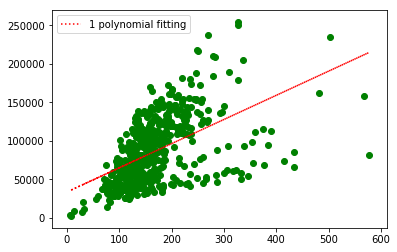

In [8]:
coef1 = np.polyfit(x,Y, 1)
poly_fit1 = np.poly1d(coef1)
plt.plot(x, poly_fit1(x), 'r:',label="1 polynomial fitting")
print(poly_fit1)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [9]:
y_true = df['sale_price'][(len(df)-44):].values
y_true

array([111809., 114281., 101351., 121962., 133916., 135236., 133484.,
        82062., 119794., 127110.,  74895., 107133.,  90395., 133430.,
        87956.,  95100.,  90573., 116655.,  99556., 103216.,  58895.,
        69339.,  63862.,  72395.,  79412.,  88258.,  79818.,  66322.,
        42904.,  54436.,  75075.,  79964., 115683.,  73464.,  90758.,
        73457.,  80850.,  89613., 104945., 164487.,  99110.,  85337.,
        74489.,  21867.])

In [10]:
y_pred = poly_fit1(df['Quantity'][(len(df)-44):].values)
y_pred

array([ 72240.92456584,  70671.64744631,  69102.37032677,  72554.77998975,
        78518.03304399,  81970.44270697,  84481.28609823,  67846.94863114,
        83853.57525041, 102057.18983704,  68160.80405505,  84795.14152213,
        82598.15355478, 101115.62356531,  80715.02101134,  81028.87643525,
        85736.70779386, 103626.46695657,  91386.10542419,  96721.64763061,
        71927.06914194,  79773.45473962,  80715.02101134,  82284.29813088,
        88247.55118511,  94524.65966326,  86364.41864167,  77262.61134836,
        64394.53896816,  80401.16558743,  85422.85236995,  79459.59931571,
        97663.21390233,  71299.35829412,  81028.87643525,  72868.63541366,
        76007.18965273,  84795.14152213,  95780.08135889, 124027.06951055,
        79145.7438918 ,  70671.64744631,  63766.82812035,  43366.22556637])

In [11]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.23472186435636005

进行简单的二阶拟合

        2
-1.173 x + 855.5 x - 1.807e+04


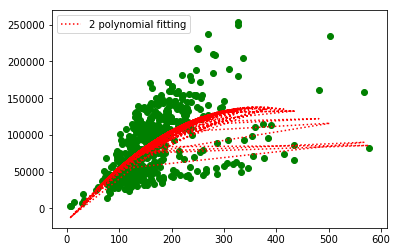

In [12]:
coef2 = np.polyfit(x,Y, 2)
poly_fit2 = np.poly1d(coef2)
plt.plot(x, poly_fit2(x), 'r:',label="2 polynomial fitting")
print(poly_fit2)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [14]:
y_true = df['sale_price'][(len(df)-44):].values
y_true

array([111809., 114281., 101351., 121962., 133916., 135236., 133484.,
        82062., 119794., 127110.,  74895., 107133.,  90395., 133430.,
        87956.,  95100.,  90573., 116655.,  99556., 103216.,  58895.,
        69339.,  63862.,  72395.,  79412.,  88258.,  79818.,  66322.,
        42904.,  54436.,  75075.,  79964., 115683.,  73464.,  90758.,
        73457.,  80850.,  89613., 104945., 164487.,  99110.,  85337.,
        74489.,  21867.])

In [15]:
y_pred = poly_fit2(df['Quantity'][(len(df)-44):].values)
y_pred

array([ 69411.52911228,  66547.22799679,  63624.29729509,  69977.35378503,
        80282.43771217,  85861.58366417,  89740.91041447,  61243.73943167,
        88785.14982758, 112693.62892719,  61842.39667269,  90215.27293273,
        86845.48645243, 111650.46109101,  83865.63588626,  84368.14060591,
        91624.28938685, 114385.33831853,  99635.14843984, 106503.26769179,
        68843.35925608,  82344.05062663,  83865.63588626,  86354.70765003,
        95278.47852611, 103757.30000874,  92551.90777236,  78183.30186253,
        54503.72767276,  83360.78598317,  91156.96241893,  81832.16517318,
       107644.93323281,  67699.98399333,  84368.14060591,  70540.83327434,
        76046.64307773,  90215.27293273, 105340.49549975, 131042.26806112,
        81317.93453629,  66547.22799679,  53247.78360449,   7322.96442719])

In [16]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.2646320557214207

三阶多项式拟合

          3         2
0.002184 x - 2.927 x + 1245 x - 4.236e+04


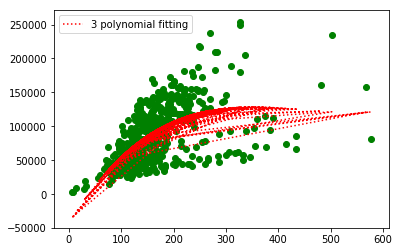

In [17]:
coef3 = np.polyfit(x,Y, 3)
poly_fit3 = np.poly1d(coef3)
plt.plot(x, poly_fit3(x), 'r:',label="3 polynomial fitting")
print(poly_fit3)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [18]:
y_pred = poly_fit3(df['Quantity'][(len(df)-44):].values)
y_pred

array([ 70569.72583348,  67395.36846433,  64113.33003625,  71191.81974173,
        82223.1086979 ,  87947.24352285,  91817.7611209 ,  61409.0680617 ,
        90872.77741135, 112601.91913672,  62091.73858038,  92284.65052834,
        88937.62345706, 111747.20901126,  85920.3535167 ,  86432.87504943,
        93663.06622843, 113966.67708836, 101250.77032749, 107391.55934823,
        69943.39021082,  84359.40931544,  85920.3535167 ,  88444.3446577 ,
        97177.9628496 , 104979.35046961,  94563.59731587,  80023.13443901,
        53604.74640971,  85403.94412051,  93207.28997652,  83831.25769536,
       108376.80886686,  68677.94139993,  86432.87504943,  71809.68504117,
        77758.64778094,  92284.65052834, 106377.3345248 , 125636.45651039,
        83299.16578948,  67395.36846433,  52126.88835038,  -6509.62805235])

In [19]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.31553022117146406